In [30]:
# to import essensial libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorama
from colorama import Fore , Style

In [24]:
import sqlite3
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables in the database:", tables)

# now i'm going to have all tables in sqlite file as dataframes:

album_df = pd.read_sql_query("SELECT * FROM Album", conn)

artist_df = pd.read_sql_query("SELECT * FROM Artist", conn)

customer_df = pd.read_sql_query("SELECT * FROM Customer", conn)

employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

genre_df = pd.read_sql_query("SELECT * FROM Genre", conn)

invoice_df = pd.read_sql_query("SELECT * FROM Invoice", conn)

invoiceline_df = pd.read_sql_query("SELECT * FROM InvoiceLine", conn)

mediatype_df = pd.read_sql_query("SELECT * FROM MediaType", conn)

playlist_df = pd.read_sql_query("SELECT * FROM Playlist", conn)

playlisttrack_df = pd.read_sql_query("SELECT * FROM PlaylistTrack", conn)

track_df = pd.read_sql_query("SELECT * FROM Track", conn)


Tables in the database:              name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [25]:
# 2 - Using the relevant commands that you know in pandas, perform an initial examination of the data.

print(album_df.describe())
print()

print(Fore.BLUE + str(artist_df.describe()) + Style.RESET_ALL)
print()

print(customer_df.describe())
print()

print(Fore.BLUE + str(employee_df.describe()) + Style.RESET_ALL)
print()

print(genre_df.describe())
print()

print(Fore.BLUE + str(invoice_df.describe()) + Style.RESET_ALL)
print()

print(invoiceline_df.describe())
print()

print(Fore.BLUE + str(mediatype_df.describe()) + Style.RESET_ALL)
print()

print(playlist_df.describe())
print()

print(Fore.BLUE + str(genre_df.describe()) + Style.RESET_ALL)
print()

print(playlisttrack_df.describe())
print()

print(Fore.BLUE + str(track_df.describe()) + Style.RESET_ALL)
print()

          AlbumId    ArtistId
count  347.000000  347.000000
mean   174.000000  121.942363
std    100.314505   77.793131
min      1.000000    1.000000
25%     87.500000   58.000000
50%    174.000000  112.000000
75%    260.500000  179.500000
max    347.000000  275.000000

         ArtistId
count  275.000000
mean   138.000000
std     79.529869
min      1.000000
25%     69.500000
50%    138.000000
75%    206.500000
max    275.000000

       CustomerId  SupportRepId
count   59.000000     59.000000
mean    30.000000      3.949153
std     17.175564      0.818403
min      1.000000      3.000000
25%     15.500000      3.000000
50%     30.000000      4.000000
75%     44.500000      5.000000
max     59.000000      5.000000

       EmployeeId  ReportsTo
count     8.00000   7.000000
mean      4.50000   2.857143
std       2.44949   2.193063
min       1.00000   1.000000
25%       2.75000   1.500000
50%       4.50000   2.000000
75%       6.25000   4.000000
max       8.00000   6.000000

         GenreI

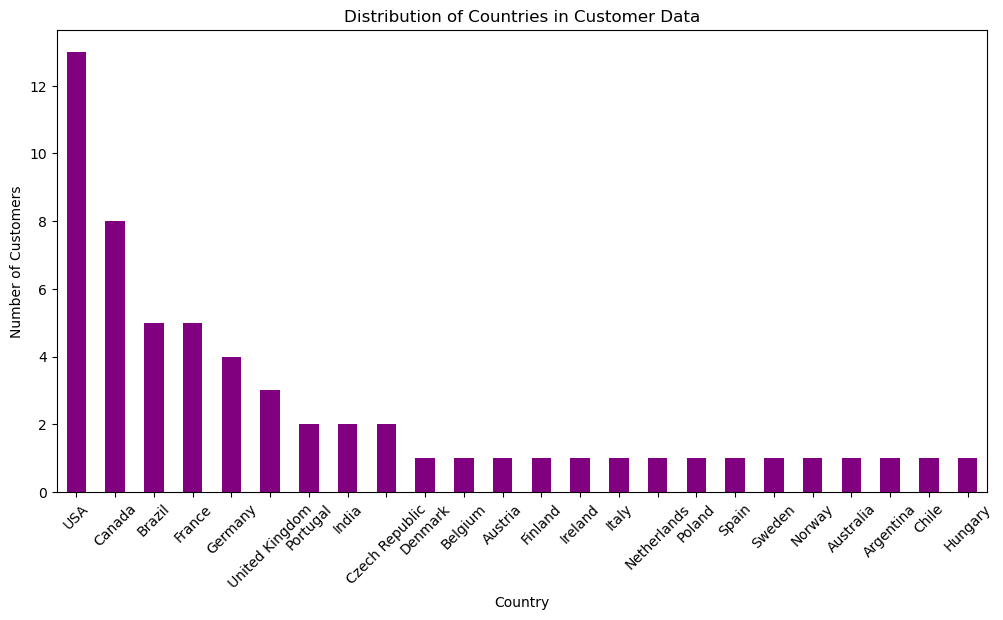

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

country_counts = customer_df['Country'].value_counts()

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Countries in Customer Data')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


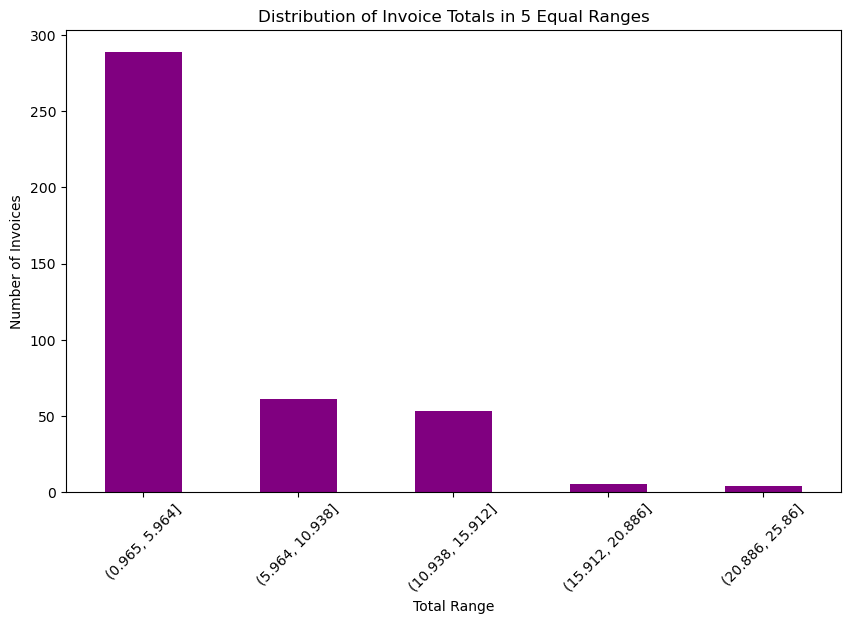

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('Chinook_Sqlite.sqlite')

invoice_df = pd.read_sql_query("SELECT Total FROM Invoice", conn)

conn.close()

bins = pd.cut(invoice_df['Total'], bins=5)

bin_counts = bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Invoice Totals in 5 Equal Ranges')
plt.xlabel('Total Range')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()


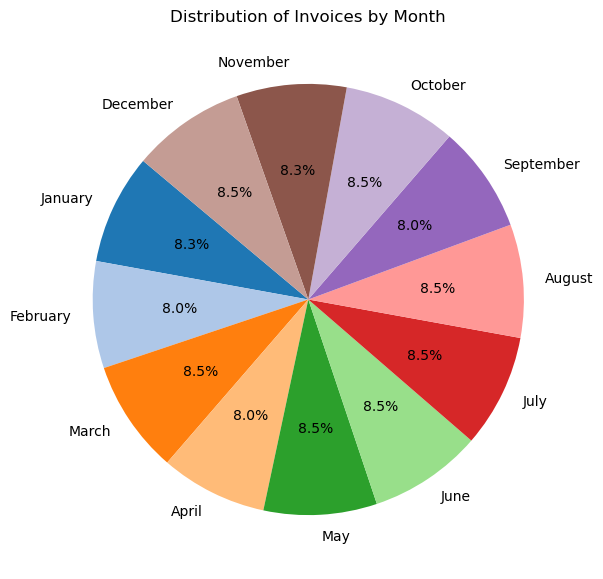

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('Chinook_Sqlite.sqlite')

invoice_df = pd.read_sql_query("SELECT InvoiceDate FROM Invoice", conn)

conn.close()

invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])


invoice_df['Month'] = invoice_df['InvoiceDate'].dt.month

month_counts = invoice_df['Month'].value_counts().sort_index()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_counts.index = month_counts.index.map(month_names)

plt.figure(figsize=(10, 7))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Invoices by Month')
plt.show()


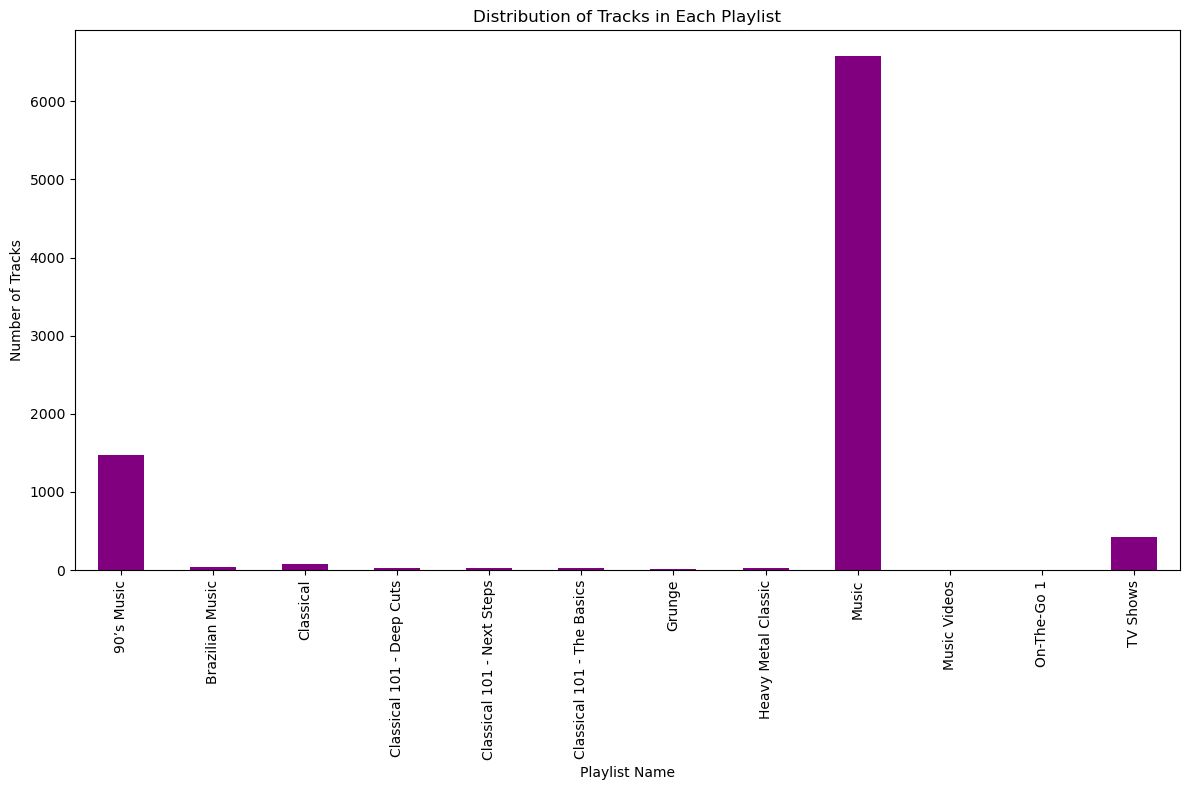

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('Chinook_Sqlite.sqlite')

playlist_df = pd.read_sql_query("SELECT PlaylistId, Name FROM Playlist", conn)
playlisttrack_df = pd.read_sql_query("SELECT PlaylistId, TrackId FROM PlaylistTrack", conn)

conn.close()

merged_df = pd.merge(playlist_df, playlisttrack_df, on='PlaylistId')

playlist_distribution = merged_df.groupby('Name').size()

plt.figure(figsize=(12, 8))
playlist_distribution.plot(kind='bar', color='purple')
plt.title('Distribution of Tracks in Each Playlist')
plt.xlabel('Playlist Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('chinook_sqlite.sqlite')

genre_df = pd.read_sql_query("SELECT * FROM Genre", conn)
invoiceline_df = pd.read_sql_query("SELECT * FROM InvoiceLine", conn)
track_df = pd.read_sql_query("SELECT * FROM Track", conn)

conn.close()

track_genre_df = pd.merge(track_df, genre_df, on='GenreId', how='left')

merged_df = pd.merge(invoiceline_df, track_genre_df, on='TrackId', how='left')

genre_column = 'Name_y'  

if genre_column in merged_df.columns:
    genre_counts = merged_df[genre_column].value_counts()

    top_genres = genre_counts.head(3)
    print("Top 3 most popular genres:")
    print(top_genres)
else:
    print(f"Column '{genre_column}' does not exist in merged_df. Check column names.")


Top 3 most popular genres:
Rock     835
Latin    386
Metal    264
Name: Name_y, dtype: int64


Top 3 most popular genres:
Rock     835
Latin    386
Metal    264
Name: Name_y, dtype: int64

Percentages of the top 3 genres:
Rock     56.228956
Latin    25.993266
Metal    17.777778
Name: Name_y, dtype: float64


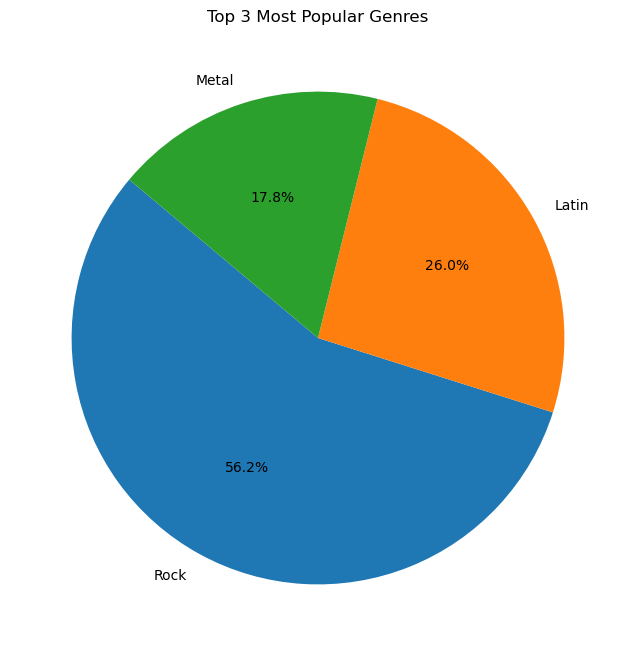

In [33]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


conn = sqlite3.connect('chinook_sqlite.sqlite')

genre_df = pd.read_sql_query("SELECT * FROM Genre", conn)
invoiceline_df = pd.read_sql_query("SELECT * FROM InvoiceLine", conn)
track_df = pd.read_sql_query("SELECT * FROM Track", conn)

conn.close()

track_genre_df = pd.merge(track_df, genre_df, on='GenreId', how='left')

merged_df = pd.merge(invoiceline_df, track_genre_df, on='TrackId', how='left')

genre_column = 'Name_y' 

if genre_column in merged_df.columns:
    
    genre_counts = merged_df[genre_column].value_counts()

    top_genres = genre_counts.head(3)
    print("Top 3 most popular genres:")
    print(top_genres)

    total_count = top_genres.sum()
    top_genres_percentage = (top_genres / total_count) * 100
     print("\nPercentages of the top 3 genres:")
    print(top_genres_percentage)


    plt.figure(figsize=(8, 8))
    plt.pie(top_genres_percentage, labels=top_genres_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title('Top 3 Most Popular Genres')
    plt.show()
else:
    print(f"Column '{genre_column}' does not exist in merged_df. Check column names.")


there is a dependence between them


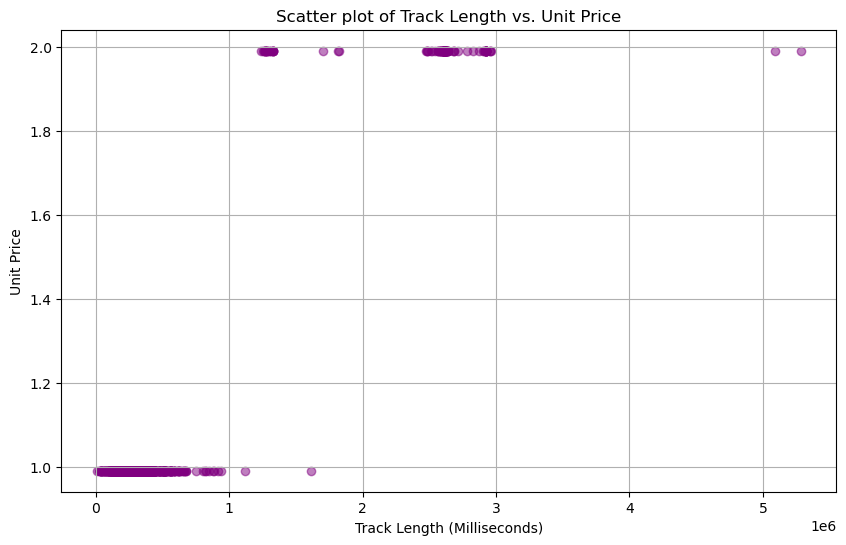

In [36]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

conn = sqlite3.connect('chinook_sqlite.sqlite')

invoiceline_df = pd.read_sql_query("SELECT * FROM InvoiceLine", conn)
track_df = pd.read_sql_query("SELECT * FROM Track", conn)

conn.close()

merged_df = pd.merge(invoiceline_df, track_df, on='TrackId', how='left', suffixes=('_invoice', '_track'))

prices = merged_df['UnitPrice_invoice']
lengths = merged_df['Milliseconds']

correlation, p_value = pearsonr(prices, lengths)

if abs(correlation) > 0.05:  
    dependence_message = "there is a dependence between them"
else:
    dependence_message = "there isn't dependence between them"

print(dependence_message)

plt.figure(figsize=(10, 6))
plt.scatter(lengths, prices, alpha=0.5, color='purple')
plt.title('Scatter plot of Track Length vs. Unit Price')
plt.xlabel('Track Length (Milliseconds)')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()


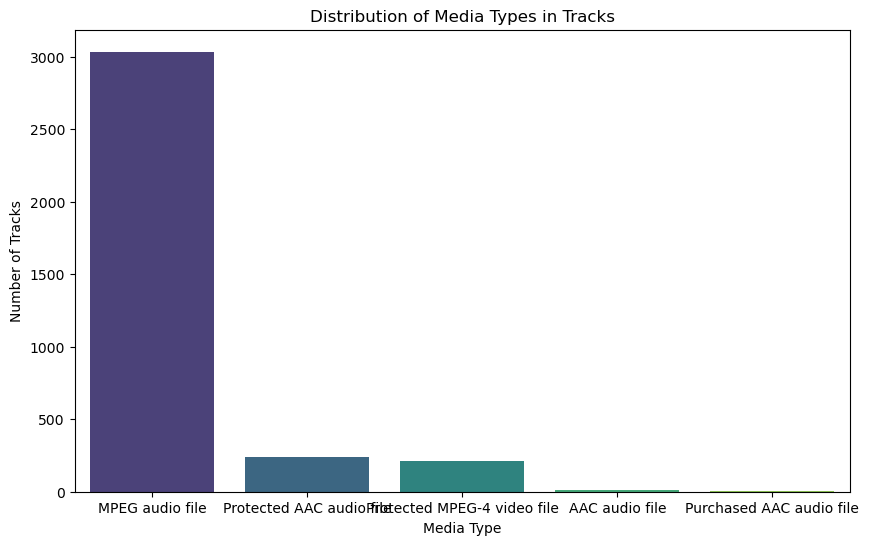

In [52]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('chinook_sqlite.sqlite')

track_query = "SELECT TrackId, MediaTypeId FROM Track"
media_type_query = "SELECT MediaTypeId, Name FROM MediaType"

track_df = pd.read_sql(track_query, conn)
media_type_df = pd.read_sql(media_type_query, conn)

conn.close()


merged_df = pd.merge(track_df, media_type_df, on='MediaTypeId', how='left')

media_type_distribution = merged_df['Name'].value_counts()


distribution_df = media_type_distribution.reset_index()
distribution_df.columns = ['MediaType', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=distribution_df, x='MediaType', y='Count', palette='viridis')

plt.title('Distribution of Media Types in Tracks')
plt.xlabel('Media Type')
plt.ylabel('Number of Tracks')

plt.show()
